In [1]:



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: aklavik, City ID: 5882953
City Name: luangwa, City ID: 909887
City Name: dolores hidalgo, City ID: 4023117
City Name: cootamundra, City ID: 2170430
City Name: erenhot, City ID: 2037485
City Name: ladario, City ID: 3459352
City Name: ponta do sol, City ID: 2264557
City Name: korla, City ID: 1529376
City Name: tuatapere, City ID: 2180815
City Name: raga, City ID: 368246
City Name: codrington, City ID: 2171099
City Name: moree, City ID: 2156927
City Name: lompoc, City ID: 5367788
City Name: kapaa, City ID: 5848280
City Name: longyearbyen, City ID: 2729907
City Name: killam, City ID: 5991888
City Name: asyut, City ID: 359783
City Name: bluff, City ID: 2206939
City Name: lavrentiya, City ID: 4031637
City Name: maltahohe, City ID: 3355624
City Name: cape town, City ID: 3369157
City Name: mataura, City ID: 6201424
City Name: chokurdakh, City ID: 2126123
City Name: lebu, City ID: 3883457
City Name: ixtapa, City ID: 4004293
City Name: rikitea, City ID: 4030556
City Name: partapur, Ci

City Name: butaritari, City ID: 2110227
City Name: santa ines, City ID: 3389609
City Name: wanaka, City ID: 2184707
City Name: samarai, City ID: 2132606
City Name: saldanha, City ID: 3361934
City Name: fairview, City ID: 5097801
City Name: micheweni, City ID: 153955
That record does not exist, searching for next record...
City Name: belyy yar, City ID: 1510377
City Name: mavrovi anovi, City ID: 790295
City Name: leningradskiy, City ID: 2123814
City Name: marzuq, City ID: 72181
City Name: hervey bay, City ID: 2146219
City Name: wilmington, City ID: 4499379
City Name: boyabat, City ID: 750468
City Name: poroshkovo, City ID: 696478
That record does not exist, searching for next record...
City Name: souillac, City ID: 933995
City Name: hualmay, City ID: 3939761
That record does not exist, searching for next record...
City Name: quatre cocos, City ID: 1106643
City Name: hofn, City ID: 2630299
That record does not exist, searching for next record...
That record does not exist, searching for 

City Name: siva, City ID: 347863
City Name: kununurra, City ID: 2068110
City Name: ilmajoki, City ID: 656739
City Name: maun, City ID: 933366
City Name: galle, City ID: 1246294
City Name: ahipara, City ID: 2194098
City Name: burgos, City ID: 3127460
City Name: jesus maria, City ID: 3853510
City Name: mandan, City ID: 5690366
City Name: sibolga, City ID: 1213855
City Name: puri, City ID: 1259184
City Name: nanortalik, City ID: 3421765
City Name: uruzgan, City ID: 1131461
City Name: bijie, City ID: 1816373
City Name: sandwick, City ID: 2638534
City Name: kamaishi, City ID: 2112444
City Name: soyo, City ID: 2236967
City Name: ukwa, City ID: 1253898
City Name: kamina, City ID: 214614
City Name: winnemucca, City ID: 5710360
City Name: tessalit, City ID: 2449893
City Name: dhidhdhoo, City ID: 1337612
City Name: antofagasta, City ID: 3899539
City Name: lubumbashi, City ID: 922704
City Name: port hardy, City ID: 6111862
That record does not exist, searching for next record...
City Name: avera,

In [5]:
#Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,5882953,Aklavik,CA,68.2191,-135.0107,-20.20,69,75,3.44
1,909887,Luangwa,ZM,-15.6167,30.4167,91.69,22,35,5.26
2,4023117,Dolores Hidalgo Cuna de la Independencia Nacional,MX,21.1561,-100.9308,60.87,34,48,3.44
3,2170430,Cootamundra,AU,-34.6500,148.0333,53.94,72,100,18.34
4,2037485,Erenhot,CN,43.6475,111.9767,22.95,57,0,4.21


In [6]:
# Export to .csv file
cities_df.to_csv("Output/city_weather.csv", index=False, header=True)

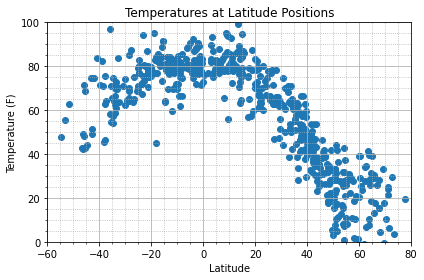

<Figure size 432x288 with 0 Axes>

In [7]:
# Latitude vs. Temperature Plot

x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")

# Data analysis: The figure below shows the relationship between temperature and the latitutde where city locates, 
# we find an inversed U shape curve suggesting that city are more close to equator, the higher temperature it would have.

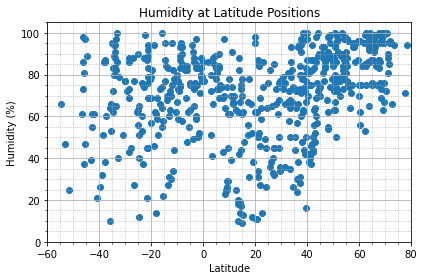

<Figure size 432x288 with 0 Axes>

In [8]:
# Latitude vs. Humidity Plot

x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

# Data analysis: The figure below shows the relationship between temperature and the humidity where city locates, 
# Our results shows a random distribution between latitude of city and its humidity ratio. 
# However, the humidity ratio in Cities allocate in the northern hemisphere (with positive latitude value) are with higher humidity ratio 


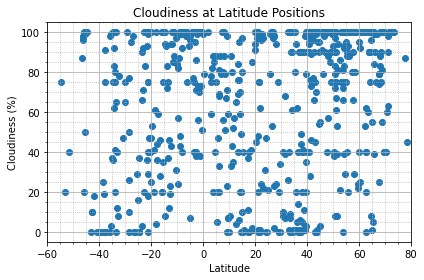

<Figure size 432x288 with 0 Axes>

In [9]:
# Latitude vs. Cloudiness Plot

x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")

# Data analysis: The figure below shows the relationship between temperature and the humidity where city locates, 
# The correlations between cloudiness and latitude is  randomly distributed between 0% to 100%.  



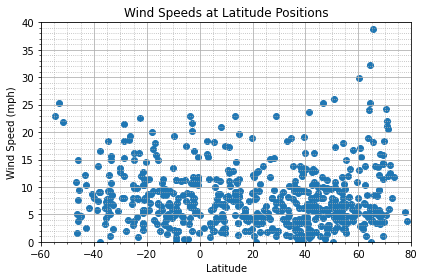

<Figure size 432x288 with 0 Axes>

In [10]:
# Latitude vs. Wind Speed Plot

x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

# Figure below shows the relationship ship between windspeed and latitude at city level, 
# apart from few outliers with windspeed over 30mp/h, the majority number of cities locates at place with windspeed lower than10-15 mp/h.
# There is no significant variations of the windspeed value in average between northern and southern hemisphere.


In [11]:
# Linear Regression

# Create a function to create Linear Regression plots
# def linear_regression(x_values, y_values):
#     (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     correlation = st.pearsonr(x_values, y_values)
    
#     print(f"r-squared: {rvalue**2}")
#     print(f"Correlation: {correlation}")
#     print(f"Line: {line_eq}")

#     return regress_values, line_eq

# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]






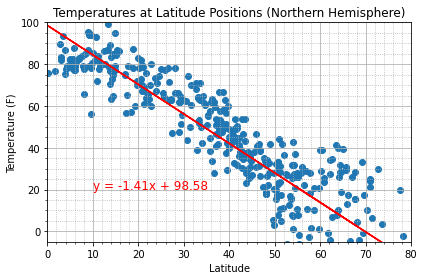

<Figure size 432x288 with 0 Axes>

In [12]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")

# Regression analysis: The regression shows the coefficients between latitude as our independent variable to temperature as the dependent variable. 
# The downward slope showing a negative relations, the intercept equals 98.58 while the slope ratio is -1.41 can be explained as: the degree on latitude (x) would in response of temperature -1.41*1+98.58=97.17 Fahrenhei in northern hemisphere.
# The higher latitude given by value x, the lower temperasture we have. Theoretically, the lowest temperature in cities locate in northern hemisphere is 13.98 Fahrenheit while the highest temperature is 98.58 Fahrenheit.


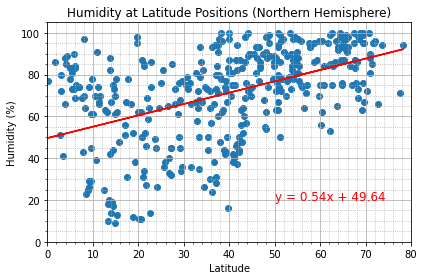

<Figure size 432x288 with 0 Axes>

In [13]:
# Max Temp vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_humid_regression.png")

# Regression analysis: The regression analysis shows the coefficients between humidity and latitude.
# The upward linear trends suggests that the increasing of latitude in northern hemisphere may leads to moderate icnrease on humidity.
# The linear function y= 0.54+49.64 shows the linear coefficients of such relationship. 
# When the city locates in place with latitude x=1, its humidity ratio equals 0.54*1+49.64= 50.18%. 
# This results improves the previous analysis using plots only. 



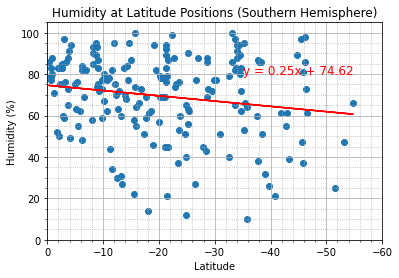

<Figure size 432x288 with 0 Axes>

In [14]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_humid_regression.png")

# Regression analysis: The linear regression analysis shows a downward trends suggesting the decreasing (beware our latitude are all negative for southern hemisphere cities) on our independent variable latitude would decrease the humidity ratio in southern hemisphere from our city samples.
# The linear function give us the quantitative analysis that if the latitude equals one, the corresponding humidity ratio at that city should equals to 0.25*1+74.62= 74.87%.
# It implies the more city close to south pole, the less humidity one may have. 

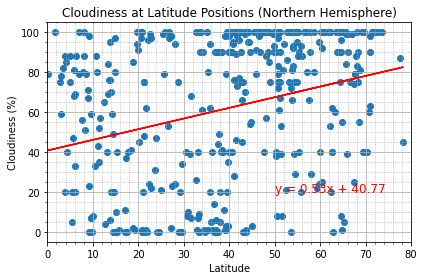

<Figure size 432x288 with 0 Axes>

In [15]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_clouds_regression.png")

# Regression analysis: The linear regression coefficients between latitude and cloudiness in northern hemisphere shows a upward trends suggesting the increasing of independent variable latitutde
# would leads to increase to cloudiness in percentage. The linear function is explained as if the latitude equals to 1, the corresponding cloudiness should equals 0.55*1+40.77=41.32%.=

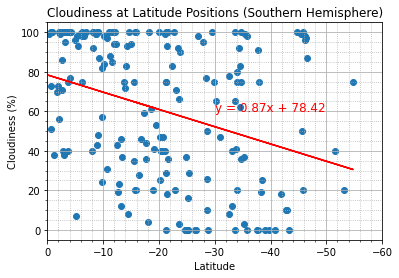

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_clouds_regression.png")

# Regression analysis: The linear regression shows the coefficients between latitude and cloudiness in sourthern hemisphere cities  
# The linear function with intercept term equals 78.42 while the slope ratio is 0.87 can be explained as:
# If the latitude is -1 degree (beware we use negative degree for southern hemisphere), the corresponding cloudiness is 0.87*-1+78.42=77.55%.
# It implies the more city close to the south pole, the less cloudiness one may have. 

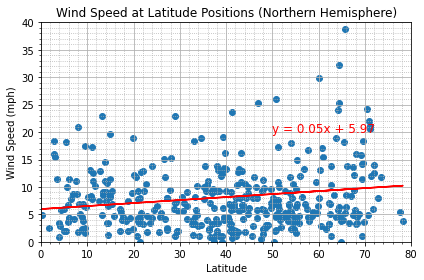

<Figure size 432x288 with 0 Axes>

In [17]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_wind_regression.png")

# Regression analysis: The linear regression shows the coefficients between latitude and wind speed in northern hemisphere cities. 
# There is a moderate upward trends between latitude and wind speed suggesting the increasing of latitude may leads to wind speed increase. 
# The linear function can be explained as the linear relationship between independent variable latitude to dependent variable wind speed.
# If the latitude degree equals 1, the corresponding wind speed at target city  should equals to 0.05*1+5.97=6.02mp/h. 


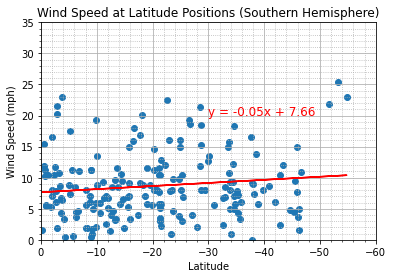

<Figure size 432x288 with 0 Axes>

In [19]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")

# Regression analysis: The linear regression analysis shows the coefficients between latitude and wind speed in southern hemisphere cities. 
# The upward slope trends shows a moderate positive coefficients between latitude and wind speed.
# The linear function shows the corresponding wind speed is equal to -0.05*-1+7.66=7.61%
# It implies the more city close to the south pole, the stronger wind speed one may experiences although the variation is moderate.  